In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nomeArquivo = 'temperature.csv'
datasets = pd.read_csv('datasets/EdificiosInteligentes/temperature.csv')

In [3]:
datasets.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.83000,287.170000,307.59,305.47,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.83465,287.186092,307.59,304.31,310.495769,304.4,304.4,303.5


In [4]:
quartos_df= ["datetime","Vancouver",	"Portland",	"San Francisco",	"Seattle",	"Los Angeles",	"San Diego",	"Las Vegas",	"Phoenix",	"Albuquerque",	"Denver",	"San Antonio",	"Dallas",	"Houston",	"Kansas City",	"Minneapolis"]

In [5]:
dfEdInteligente = datasets[quartos_df]

In [6]:
dfEdInteligente.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166


In [7]:
#adiciona o nova cabeçalho ao bataset
dfEdInteligente.columns= ["datetime", "Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15"]

In [8]:
dfEdInteligente.head()


,datetime,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166


In [9]:
dfEdInteligente.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  45253 non-null  object 
 1   Q1        44458 non-null  float64
 2   Q2        45252 non-null  float64
 3   Q3        44460 non-null  float64
 4   Q4        45250 non-null  float64
 5   Q5        45250 non-null  float64
 6   Q6        45252 non-null  float64
 7   Q7        45252 non-null  float64
 8   Q8        45250 non-null  float64
 9   Q9        45252 non-null  float64
 10  Q10       45252 non-null  float64
 11  Q11       45252 non-null  float64
 12  Q12       45249 non-null  float64
 13  Q13       45250 non-null  float64
 14  Q14       45252 non-null  float64
 15  Q15       45240 non-null  float64
dtypes: float64(15), object(1)
memory usage: 5.5+ MB


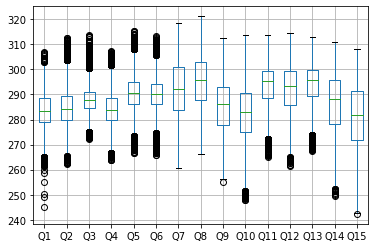

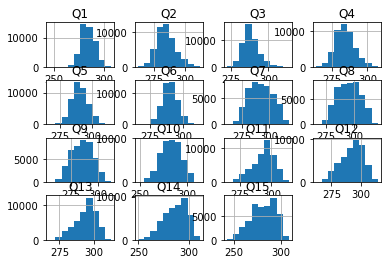

In [10]:
dfEdInteligente.boxplot()
dfEdInteligente.hist()
plt.show()

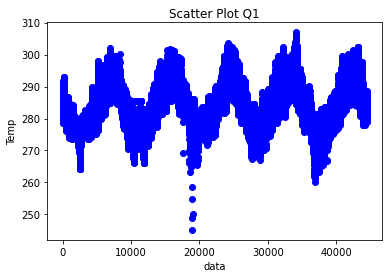

In [11]:


plt.scatter(x = dfEdInteligente.index,
            y = dfEdInteligente.Q1,
           c ='blue')
plt.xlabel('data')
plt.ylabel('Temp')
plt.title('Scatter Plot Q1')
plt.show()

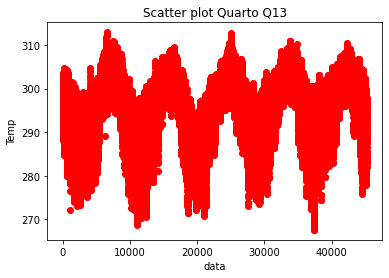

In [12]:
plt.scatter(dfEdInteligente.index, dfEdInteligente.Q13, c='red')

plt.title('Scatter plot Quarto Q13')
plt.xlabel('data')
plt.ylabel('Temp')
plt.show()

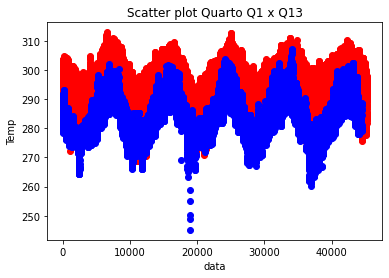

In [13]:
plt.scatter(dfEdInteligente.index, dfEdInteligente.Q13, c='red')
plt.scatter(x = dfEdInteligente.index,
            y = dfEdInteligente.Q1,
           c ='blue')
plt.title('Scatter plot Quarto Q1 x Q13')
plt.xlabel('data')
plt.ylabel('Temp')
plt.show()

In [14]:
dfEdInteligente.min()

datetime    2012-10-01 12:00:00
Q1                       245.15
Q2                       262.37
Q3                        272.3
Q4                       263.78
Q5                      266.504
Q6                      265.783
Q7                      260.561
Q8                      266.059
Q9                      255.042
Q10                     247.728
Q11                      265.05
Q12                      261.61
Q13                      267.57
Q14                     249.556
Q15                     242.337
dtype: object

In [15]:
dfEdInteligente.max()

datetime    2017-11-30 00:00:00
Q1                          307
Q2                       312.52
Q3                       313.62
Q4                        307.3
Q5                       315.47
Q6                       313.36
Q7                       318.64
Q8                       321.22
Q9                       312.71
Q10                      313.75
Q11                      313.66
Q12                       314.4
Q13                      312.91
Q14                      310.97
Q15                      308.24
dtype: object

# Processamento dos dados

In [16]:
# Eliminando nan
dfEdInteligente.dropna()

,datetime,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,284.585142,289.408193,289.966352,288.407879,290.119181,287.066931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,286.440000,293.840000,297.060000,286.150000,299.990000,299.390000,298.430000,302.150000,284.370000,277.260000,291.910000,282.010000,292.820000,279.160000,274.150000
44457,2017-10-27 21:00:00,287.870000,294.850000,299.140000,288.140000,301.320000,299.700000,299.430000,303.650000,285.890000,277.920000,290.910000,282.150000,292.440000,278.820000,274.150000
44458,2017-10-27 22:00:00,288.420000,295.570000,300.560000,289.440000,301.600000,300.160000,300.560000,304.480000,286.400000,278.020000,290.370000,282.480000,291.440000,279.320000,274.150000
44459,2017-10-27 23:00:00,288.650000,294.990000,301.060000,290.590000,301.760000,300.770000,300.810000,304.950000,286.890000,277.690000,290.270000,282.950000,290.140000,279.150000,274.280000


In [17]:
# Selecionado as features
dfEd2 = dfEdInteligente[["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13","Q14","Q15"]]

In [18]:
dfEd2.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000
2,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636
3,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401
4,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166


In [20]:
# Transformadno dados em graus celsius

dfEd2 = dfEd2.apply(lambda x: x-273, axis = 1)

In [21]:
dfEd2.dropna() #retira os valores NaN

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
1,-261.370000,-263.920000,-256.520000,-264.200000,-254.130000,-254.470000,-252.590000,-249.400000,-260.880000,-261.390000,-256.710000,-256.260000,-257.730000,-256.020000,-259.130000
2,-261.370959,-263.916748,-256.525007,-264.202783,-254.131814,-254.466499,-252.596859,-249.391491,-260.845442,-261.392694,-256.696351,-256.237026,-257.702424,-256.002365,-259.106364
3,-261.373002,-263.908134,-256.539382,-264.210167,-254.137156,-254.456645,-252.607823,-249.368513,-260.766048,-261.400082,-256.661503,-256.169233,-257.665657,-255.961849,-259.048599
4,-261.375045,-263.899519,-256.553757,-264.217551,-254.142497,-254.446791,-252.618787,-249.345534,-260.686655,-261.407470,-256.626655,-256.101440,-257.628889,-255.921334,-258.990834
5,-261.377089,-263.890905,-256.568131,-264.224935,-254.147838,-254.436937,-252.629751,-249.322555,-260.607262,-261.414858,-256.591807,-256.033648,-257.592121,-255.880819,-258.933069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,-259.560000,-252.160000,-248.940000,-259.850000,-246.010000,-246.610000,-247.570000,-243.850000,-261.630000,-268.740000,-254.090000,-263.990000,-253.180000,-266.840000,-271.850000
44457,-258.130000,-251.150000,-246.860000,-257.860000,-244.680000,-246.300000,-246.570000,-242.350000,-260.110000,-268.080000,-255.090000,-263.850000,-253.560000,-267.180000,-271.850000
44458,-257.580000,-250.430000,-245.440000,-256.560000,-244.400000,-245.840000,-245.440000,-241.520000,-259.600000,-267.980000,-255.630000,-263.520000,-254.560000,-266.680000,-271.850000
44459,-257.350000,-251.010000,-244.940000,-255.410000,-244.240000,-245.230000,-245.190000,-241.050000,-259.110000,-268.310000,-255.730000,-263.050000,-255.860000,-266.850000,-271.720000


<AxesSubplot:>

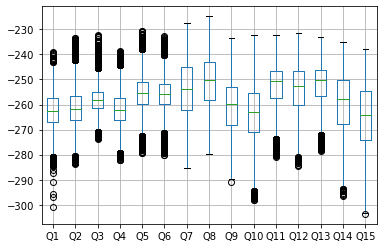

In [22]:
dfEd2.boxplot()

## Realizando uma análise sobre a variação de temperatura de um quarto para a previsão de séries temporais

In [23]:
# selecioando série Q3
serieTemporal = dfEd2['Q3']

<AxesSubplot:>

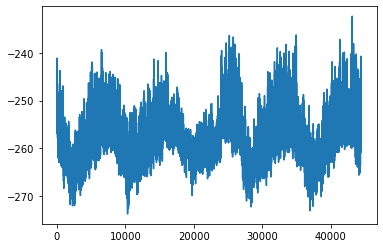

In [24]:
serieTemporal.plot()

In [25]:
serieTemporal

0               NaN
1       -256.520000
2       -256.525007
3       -256.539382
4       -256.553757
            ...    
45248           NaN
45249           NaN
45250           NaN
45251           NaN
45252           NaN
Name: Q3, Length: 45253, dtype: float64

In [26]:
serieTreinamento = serieTemporal[:int(0.8*len(serieTemporal))]  

In [27]:
type(serieTreinamento.values)

numpy.ndarray

# Normalização dos dados

In [28]:
scaler = MinMaxScaler()

dados_normalizados = scaler.fit_transform(serieTreinamento.values.reshape(-1 ,1))

In [29]:
dados_normalizados

array([[       nan],
       [0.4592355 ],
       [0.45910165],
       ...,
       [0.42635659],
       [0.42956429],
       [0.4592355 ]])

### Verificando nan

In [30]:
dados_normalizados.shape

(36202, 1)

In [31]:
# Removendo nan
dados_normalizados = dados_normalizados[~np.isnan(dados_normalizados)]

In [32]:
dados_normalizados = dados_normalizados.reshape(-1,1)

In [33]:
dados_normalizados.shape

(36201, 1)

In [34]:
dados_normalizados[:10,0]

array([0.4592355 , 0.45910165, 0.4587174 , 0.45833316, 0.45794891,
       0.45756466, 0.45718041, 0.45679617, 0.45641192, 0.45602767])

In [35]:
features_set = []
labels = []

for i in range(72, len(dados_normalizados)):
    features_set.append(dados_normalizados[i-72:i,0]) # Séries co, 72 horas de atraso
    labels.append(dados_normalizados[i,0]) # série original

In [36]:
serieTreinamento.size

36202

In [37]:
type(dados_normalizados)

numpy.ndarray

In [38]:
# Convertendo as listas em array para servir como entrada da Rede LSTM
features_set, labels = np.array(features_set),np.array(labels)

In [39]:
#conferindo a dimensão dos dados
print(features_set.shape) # método utilizado para retornar a dimensão dos dados
print(labels.shape)

(36129, 72)
(36129,)


In [40]:
#transformando os dados para o formato aceito pelas redes recorrentes do Keras
# 1 - formato em 3D
# (a,b,c) -> a = número de linhas do dataset
#         -> b = número de steps (entradas) da rede
#         -> c = número de saídas (indicators)

# método da biblioteca numpy que é utilizado para converter os dados de entrada (1199,60) em (1199,60,1)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  # 
print(features_set.shape)

(36129, 72, 1)


In [41]:
#import tensorflow as tf

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))






model.add(Dropout(0.2))  # o valor de 0.2 indica que 20% dos neurônios dessa camada serão perdidos para cada interação



#Adicionando mais camadas ao modelo 
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  # como essa é a última camada LSTM utilizada, a variável return_sequences=False 
model.add(Dropout(0.2))  


#adiciona a camada de saída com apenas 1 neurônio, pois vamos realizar a previsão de apenas uma variável (Previsão do valor de abertura)
model.add(Dense(units = 1))




In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 72, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 72, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 72, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 72, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [45]:
#definição do tipo de função perda a ser utilizada e do tipo do otimizador 
# o otimizador é utilizado para minimizar a função perda
# a função perda indica como deve ser calculado o erro do modelo (valor real - valor previsto)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
#treinamento do modelo
model.fit(features_set, labels, epochs =10, batch_size = 32)  
# valores de entrada
# saída
# número épocas para o treinamento (vezes em que vamos realizar interações durante o treinamento)
#batch_size = quantidade de dados utilizados por vez para realizar o treinamento

Train on 36129 samples
Epoch 1/10
36129/36129 [==============================] - 19s 512us/sample - loss: 0.0063
Epoch 2/10
36129/36129 [==============================] - 13s 366us/sample - loss: 0.0025
Epoch 3/10
36129/36129 [==============================] - 13s 362us/sample - loss: 0.0017
Epoch 4/10
36129/36129 [==============================] - 13s 357us/sample - loss: 0.0012
Epoch 5/10
36129/36129 [==============================] - 13s 361us/sample - loss: 9.7474e-04
Epoch 6/10
36129/36129 [==============================] - 13s 364us/sample - loss: 9.0027e-04
Epoch 7/10
36129/36129 [==============================] - 13s 360us/sample - loss: 8.5011e-04
Epoch 8/10
36129/36129 [==============================] - 13s 366us/sample - loss: 8.2950e-04
Epoch 9/10
36129/36129 [==============================] - 13s 359us/sample - loss: 8.1677e-04
Epoch 10/10
36129/36129 [==============================] - 13s 357us/sample - loss: 8.0840e-04


In [47]:
# Dados de teste

seriesTeste = serieTemporal[int(0.8*len(serieTemporal)):]

In [ ]:
seriesTeste = serieTeste[~np.isnan(seriesTeste)]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vinicius\anaconda3\envs\keras-tf-test\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-8722fefaf857>", line 1, in <module>
    seriesTeste = serieTeste[~np.isnan(seriesTeste)]
NameError: name 'serieTeste' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vinicius\anaconda3\envs\keras-tf-test\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vinicius\anaconda3\envs\keras-tf-test\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, nu